# Importing libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torch.optim import SGD, Adam, lr_scheduler
from copy import deepcopy
from utils import *
from tta import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_transform = transforms.Compose([                                      
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# Pretrained Resnet, changing only last layer, finetuning all layers

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [15:45<00:00, 189.06s/it]


Accuracy on validation set:  92.74
Accuracy on test set:  92.89


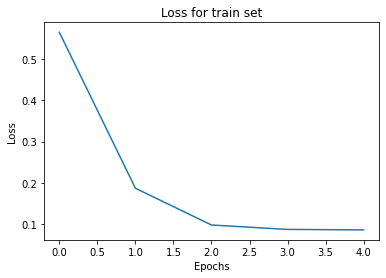

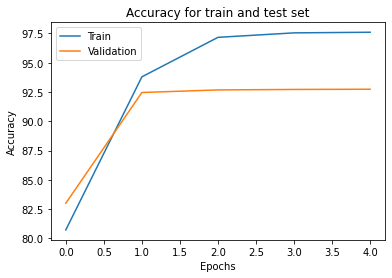

In [ ]:
class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet18(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Linear(in_features = in_features, out_features = 10)
    
    def forward(self,x):
        return self.pretrained_model(x)

model = ResnetCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
train_loader, val_loader, test_loader = load_data(train_transform, test_transform)

train_network(model, train_loader, val_loader, epochs = 5, print_results=False, 
              criterion = criterion, optimizer = optimizer, scheduler=scheduler)
print('Accuracy on validation set: ', evaluate_network(model, val_loader))
print('Accuracy on test set: ', evaluate_network(model, test_loader))
plot_loss(model)
plot_accuracy(model)

# Pretrained Resnet, changing only last layer, finetuning all layers, dropout before last layer

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [15:46<00:00, 189.39s/it]


Accuracy on validation set:  92.52
Accuracy on test set:  92.82


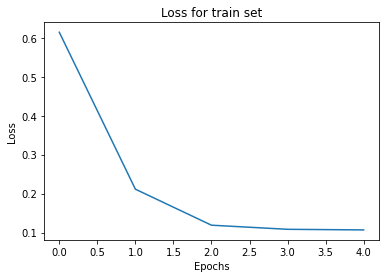

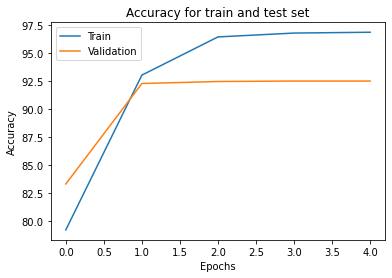

In [ ]:
class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet18(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Sequential(
                                  nn.Dropout(),
                                  nn.Linear(in_features, 10)
                              )
    
    def forward(self,x):
        return self.pretrained_model(x)

model = ResnetCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
train_network(model, train_loader, val_loader, epochs = 5, print_results=False, 
              criterion = criterion, optimizer = optimizer, scheduler=scheduler)
print('Accuracy on validation set: ', evaluate_network(model, val_loader))
print('Accuracy on test set: ', evaluate_network(model, test_loader))
plot_loss(model)
plot_accuracy(model)

# Pretrained Resnet, changing only last layer, finetuning last layer only

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [07:01<00:00, 84.35s/it]


Accuracy on validation set:  77.44
Accuracy on test set:  77.64


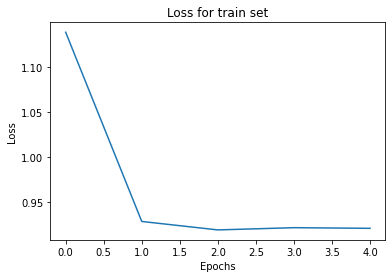

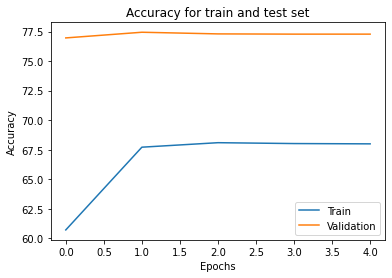

In [ ]:
class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet18(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Linear(in_features, 10)
    
        for param in self.pretrained_model.parameters():
            param.requires_grad = False

        for param in self.pretrained_model.fc.parameters():
            param.requires_grad = True

    def forward(self,x):
        return self.pretrained_model(x)

model = ResnetCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
train_network(model, train_loader, val_loader, epochs = 5, print_results=False, 
              criterion = criterion, optimizer = optimizer, scheduler=scheduler)
print('Accuracy on validation set: ', evaluate_network(model, val_loader))
print('Accuracy on test set: ', evaluate_network(model, test_loader))
plot_loss(model)
plot_accuracy(model)

# Pretrained Resnet, changing only last layer, finetuning last few layers

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified



100%|██████████| 5/5 [07:50<00:00, 94.15s/it]


Accuracy on validation set:  91.8
Accuracy on test set:  91.53


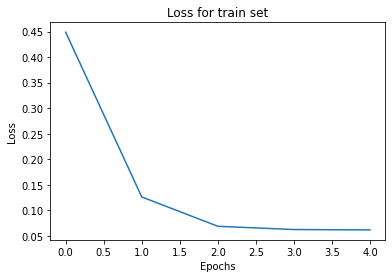

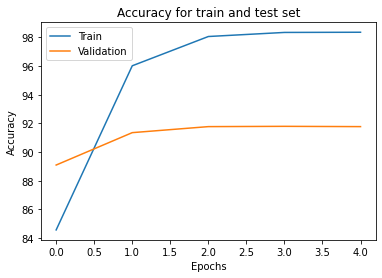

In [ ]:
class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet18(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Linear(in_features, 10)
    
        for param in self.pretrained_model.parameters():
            param.requires_grad = False

        for param in self.pretrained_model.fc.parameters():
            param.requires_grad = True

        for param in self.pretrained_model.layer4.parameters():
            param.requires_grad = True

    def forward(self,x):
        return self.pretrained_model(x)

model = ResnetCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
train_network(model, train_loader, val_loader, epochs = 5, print_results=False, 
              criterion = criterion, optimizer = optimizer, scheduler=scheduler)
print('Accuracy on validation set: ', evaluate_network(model, val_loader))
print('Accuracy on test set: ', evaluate_network(model, test_loader))
plot_loss(model)
plot_accuracy(model)

# Different optimizers

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
Training loss: 0.51616947338846
Training accuracy: 83.63777777777777%



 20%|██        | 1/5 [03:00<12:00, 180.12s/it]

Validation accuracy: 92.42%
------------------------------
Epoch 2
Training loss: 0.1730376293003559
Training accuracy: 94.48222222222222%



 40%|████      | 2/5 [06:07<09:06, 182.20s/it]

Validation accuracy: 93.62%
------------------------------
Epoch 3
Training loss: 0.09210525992628601
Training accuracy: 97.55555555555556%



 60%|██████    | 3/5 [09:14<06:07, 183.87s/it]

Validation accuracy: 93.7%
------------------------------
Epoch 4
Training loss: 0.0460669477554659
Training accuracy: 99.18222222222222%



 80%|████████  | 4/5 [12:23<03:05, 185.17s/it]

Validation accuracy: 93.84%
------------------------------
Epoch 5
Training loss: 0.022684238435948887
Training accuracy: 99.82444444444444%



100%|██████████| 5/5 [15:31<00:00, 186.23s/it]

Validation accuracy: 94.2%
------------------------------
Finished Training


Accuracy on validation set:  94.2
Accuracy on test set:  93.92


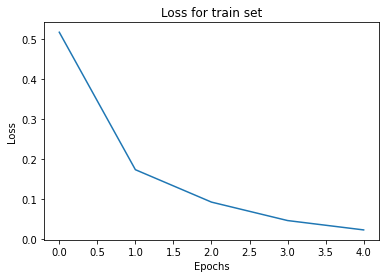

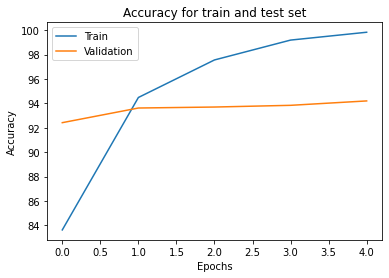

In [ ]:
class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet18(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Linear(in_features, 10)
    
    def forward(self,x):
        return self.pretrained_model(x)

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)

model = ResnetCNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.001,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

train_network(model, train_loader, val_loader, epochs = 5, print_results=True, 
            optimizer = optimizer, scheduler=scheduler)
print('Accuracy on validation set: ', evaluate_network(model, val_loader))
print('Accuracy on test set: ', evaluate_network(model, test_loader))
plot_loss(model)
plot_accuracy(model)

# Different augmentations on training set

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
Training loss: 0.38411310708787705
Training accuracy: 86.88888888888889%


 20%|██        | 1/5 [03:17<13:08, 197.02s/it]

Validation accuracy: 91.24%
------------------------------
Epoch 2
Training loss: 0.17071699479164348
Training accuracy: 94.14888888888889%


 40%|████      | 2/5 [06:32<09:49, 196.48s/it]

Validation accuracy: 92.58%
------------------------------
Epoch 3
Training loss: 0.1147017698218425
Training accuracy: 96.01333333333334%


 60%|██████    | 3/5 [09:47<06:32, 196.04s/it]

Validation accuracy: 92.74%
------------------------------
Epoch 4
Training loss: 0.08289549877262778
Training accuracy: 97.16666666666667%


 80%|████████  | 4/5 [13:02<03:15, 195.71s/it]

Validation accuracy: 93.48%
------------------------------
Epoch 5
Training loss: 0.06339027717080381
Training accuracy: 97.86888888888889%


100%|██████████| 5/5 [16:17<00:00, 195.50s/it]

Validation accuracy: 94.28%
------------------------------
Finished Training


Accuracy on validation set:  94.28
Accuracy on test set:  94.58


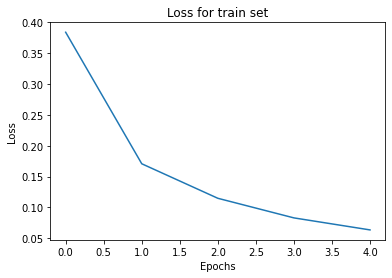

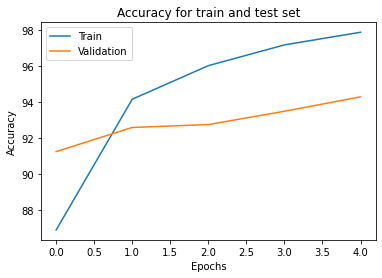

In [ ]:
train_transform = transforms.Compose([                                      
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet18(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Linear(in_features, 10)
    
    def forward(self,x):
        return self.pretrained_model(x)

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)

model = ResnetCNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.005,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

train_network(model, train_loader, val_loader, epochs = 5, print_results=True, 
            optimizer = optimizer, scheduler=scheduler)
print('Accuracy on validation set: ', evaluate_network(model, val_loader))
print('Accuracy on test set: ', evaluate_network(model, test_loader))
plot_loss(model)
plot_accuracy(model)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
Training loss: 0.38411310708787705
Training accuracy: 86.88888888888889%


 20%|██        | 1/5 [03:12<12:48, 192.06s/it]

Validation accuracy: 91.24%
------------------------------
Epoch 2
Training loss: 0.17071699479164348
Training accuracy: 94.14888888888889%


 40%|████      | 2/5 [06:23<09:35, 191.94s/it]

Validation accuracy: 92.58%
------------------------------
Epoch 3
Training loss: 0.1147017698218425
Training accuracy: 96.01333333333334%


 60%|██████    | 3/5 [09:36<06:24, 192.06s/it]

Validation accuracy: 92.74%
------------------------------
Epoch 4
Training loss: 0.08289549877262778
Training accuracy: 97.16666666666667%


 80%|████████  | 4/5 [12:48<03:12, 192.08s/it]

Validation accuracy: 93.48%
------------------------------
Epoch 5
Training loss: 0.06339027717080381
Training accuracy: 97.86888888888889%


100%|██████████| 5/5 [15:59<00:00, 191.89s/it]

Validation accuracy: 94.28%
------------------------------
Finished Training


Accuracy on validation set:  94.28
Accuracy on test set:  94.58


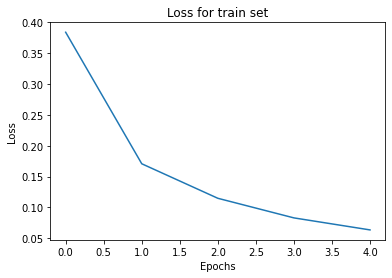

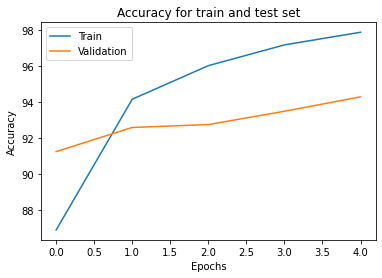

In [ ]:
train_transform = transforms.Compose([                                      
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet18(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Linear(in_features, 10)
    
    def forward(self,x):
        return self.pretrained_model(x)

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)

model = ResnetCNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.005,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

train_network(model, train_loader, val_loader, epochs = 5, print_results=True, 
            optimizer = optimizer, scheduler=scheduler)
print('Accuracy on validation set: ', evaluate_network(model, val_loader))
print('Accuracy on test set: ', evaluate_network(model, test_loader))
plot_loss(model)
plot_accuracy(model)

# Test time Augmentations

In [ ]:
tta = [transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
])]

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
print('TTA: HorizontalFlip')
print('validation with tta: ', evaluate_tta(model, val_loader, tta, 5000))
print('test with tta: ', evaluate_tta(model, test_loader, tta, 10000))
print('-'*50)
print()


tta = [
    transforms.Compose([
        transforms.RandomHorizontalFlip(p=1),
]), 
    transforms.Compose([
        transforms.RandomRotation(10),
])
]

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
print('TTA: HorizontalFlip and Rotation')
print('validation with tta: ', evaluate_tta(model, val_loader, tta, 5000))
print('test with tta: ', evaluate_tta(model, test_loader, tta, 10000))
print('-'*50)
print()


tta = [
    transforms.Compose([
        transforms.RandomHorizontalFlip(p=1),
]), 
    transforms.Compose([
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
])
]

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
print('TTA: HorizontalFlip and crop')
print('validation with tta: ', evaluate_tta(model, val_loader, tta, 5000))
print('test with tta: ', evaluate_tta(model, test_loader, tta, 10000))
print('-'*50)
print()



tta = [
    transforms.Compose([
        transforms.RandomHorizontalFlip(p=1),
]), 
    transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
])
]

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
print('TTA: HorizontalFlip with crop')
print('validation with tta: ', evaluate_tta(model, val_loader, tta, 5000))
print('test with tta: ', evaluate_tta(model, test_loader, tta, 10000))
print('-'*50)
print()


tta = [
    transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
]), 
    transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(10),
]), 
    transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
]),
    transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
]),
    transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
    transforms.RandomRotation(10),
]),
    transforms.Compose([
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
]),
    transforms.Compose([
    transforms.RandomRotation(10),
])
]
train_loader, val_loader, test_loader = load_data(train_transform, test_transform)
print('TTA: all combined')
print('validation with tta: ', evaluate_tta(model, val_loader, tta, 5000))
print('test with tta: ', evaluate_tta(model, test_loader, tta, 10000))
print('-'*50)
print()



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
TTA: HorizontalFlip
validation with tta:  0.9496
test with tta:  0.9506
--------------------------------------------------

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
TTA: HorizontalFlip and Rotation
validation with tta:  0.948
test with tta:  0.9487
--------------------------------------------------

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
TTA: HorizontalFlip and crop
validation with tta:  0.9492
test with tta:  0.9495
--------------------------------------------------

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
TTA: HorizontalFlip with crop
validation with tta:  0.9484
test with tta:  0.9502
--------------------------------------------------

Files already dow

# ResNet34

In [ ]:
train_transform = transforms.Compose([                                      
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ResnetCNN(nn.Module):
    def __init__(self):

        super(ResnetCNN, self).__init__()
        self.pretrained_model = models.resnet34(pretrained=True)

        in_features = self.pretrained_model.fc.in_features
        self.pretrained_model.fc = nn.Linear(in_features, 10)
    
    def forward(self,x):
        return self.pretrained_model(x)

train_loader, val_loader, test_loader = load_data(train_transform, test_transform)

model = ResnetCNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.005,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

train_network(model, train_loader, val_loader, epochs = 15, print_results=True, 
            optimizer = optimizer, scheduler=scheduler)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1
Training loss: 0.3120052908261617
Training accuracy: 89.41555555555556%


  7%|▋         | 1/15 [05:20<1:14:53, 320.96s/it]

Validation accuracy: 94.06%
------------------------------
Epoch 2
Training loss: 0.07602461816000028
Training accuracy: 97.38888888888889%


 13%|█▎        | 2/15 [10:46<1:09:48, 322.22s/it]

Validation accuracy: 94.86%
------------------------------
Epoch 3
Training loss: 0.02681786700743768
Training accuracy: 99.2088888888889%


 20%|██        | 3/15 [16:11<1:04:37, 323.15s/it]

Validation accuracy: 95.06%
------------------------------
Epoch 4
Training loss: 0.013146078828577367
Training accuracy: 99.61111111111111%


 27%|██▋       | 4/15 [21:36<59:22, 323.83s/it]  

Validation accuracy: 95.42%
------------------------------
Epoch 5
Training loss: 0.006821463493759641
Training accuracy: 99.83333333333333%


 33%|███▎      | 5/15 [27:01<54:02, 324.22s/it]

Validation accuracy: 96.0%
------------------------------
Epoch 6
Training loss: 0.004017500536754313
Training accuracy: 99.92%


 40%|████      | 6/15 [32:27<48:40, 324.51s/it]

Validation accuracy: 96.14%
------------------------------
Epoch 7
Training loss: 0.0007348971455720149
Training accuracy: 100.0%


 47%|████▋     | 7/15 [37:52<43:17, 324.71s/it]

Validation accuracy: 96.8%
------------------------------
Epoch 8
Training loss: 0.0003236093496075935
Training accuracy: 100.0%


 53%|█████▎    | 8/15 [43:17<37:53, 324.78s/it]

Validation accuracy: 96.8%
------------------------------
Epoch 9
Training loss: 0.0002875566631814258
Training accuracy: 100.0%


 60%|██████    | 9/15 [48:42<32:29, 324.88s/it]

Validation accuracy: 96.82%
------------------------------
Epoch 10
Training loss: 0.0002824431675175826
Training accuracy: 100.0%


 67%|██████▋   | 10/15 [54:07<27:04, 324.97s/it]

Validation accuracy: 96.82%
------------------------------
Epoch 11
Training loss: 0.0002847439161812266
Training accuracy: 100.0%


 73%|███████▎  | 11/15 [59:32<21:40, 325.04s/it]

Validation accuracy: 96.82%
------------------------------
Epoch 12
Training loss: 0.0002906624368650632
Training accuracy: 100.0%


 80%|████████  | 12/15 [1:04:57<16:15, 325.05s/it]

Validation accuracy: 96.8%
------------------------------
Epoch 13
Training loss: 0.0002985356722596205
Training accuracy: 100.0%


 87%|████████▋ | 13/15 [1:10:23<10:50, 325.12s/it]

Validation accuracy: 96.8%
------------------------------
